In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arff

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

DATA_DIR = "../data/raw"
ADULT_PATH = os.path.join(DATA_DIR, "dataset")
HAR_PATH   = os.path.join(DATA_DIR, "php0gEU7D.arff")
GAS_PATH   = os.path.join(DATA_DIR, "phpN4gaxw.arff")

def cargar_arff(path):
    with open(path) as f:
        data = arff.load(f)
    columnas = [attr[0] for attr in data["attributes"]]
    df = pd.DataFrame(data["data"], columns=columnas)
    return df

adult_df = cargar_arff(ADULT_PATH)
print("Adult dataset cargado")
print(f"Dimensiones: {adult_df.shape}")
print(f"Columnas: {adult_df.columns.tolist()}")

har_df = cargar_arff(HAR_PATH)
print("HAR dataset cargado")
print(f"Dimensiones: {har_df.shape}")
print(f"Columnas: {har_df.columns.tolist()}")

gas_df = cargar_arff(GAS_PATH)
print("Gas Sensor dataset cargado")
print(f"Dimensiones: {gas_df.shape}")
print(f"Columnas: {gas_df.columns.tolist()}")


Adult dataset cargado
Dimensiones: (32561, 15)
Columnas: ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']
HAR dataset cargado
Dimensiones: (180, 68)
Columnas: ['Person', 'Activity', 'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-std()-X', 'tGravityAcc-std()-Y', 'tGravityAcc-std()-Z', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z', 'tBodyGyro-std()-X', 'tBodyGyro-std()-Y', 'tBodyGyro-std()-Z', 'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z', 'tBodyGyroJerk-std()-X', 'tBodyGyroJerk-std()-Y

In [3]:
gas_df['Class'].value_counts()

Class
5    3009
2    2926
1    2565
4    1936
6    1833
3    1641
Name: count, dtype: int64

In [4]:
datasets = {
    "Adult": adult_df,
    "HAR": har_df,
    "Gas": gas_df
}

for nombre, df in datasets.items():
    print(f"\n=== {nombre} Dataset ===")
    print(f"→ Dimensiones: {df.shape}")
    print(f"→ Tipos de datos:\n{df.dtypes}")
    print(f"→ Valores nulos (isnull):\n{df.isnull().sum().sort_values(ascending=False)}")

    # Detección de '?' como posible marcador de nulos
    if df.select_dtypes(include='object').shape[1] > 0:
        conteo_interrogacion = (df == '?').sum()
        print(f"→ '?' como posibles nulos:\n{conteo_interrogacion[conteo_interrogacion > 0]}")


=== Adult Dataset ===
→ Dimensiones: (32561, 15)
→ Tipos de datos:
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
→ Valores nulos (isnull):
occupation        1843
workclass         1836
native.country     583
fnlwgt               0
education            0
education.num        0
age                  0
marital.status       0
relationship         0
sex                  0
race                 0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64
→ '?' como posibles nulos:
Series([], dtype: int64)

=== HAR Dataset ===
→ Dimensiones: (180, 68)
→ Tipos de datos:
Person                          object
Acti

In [5]:
# Adult Dataset
print("\n=== Adult Dataset ===")


=== Adult Dataset ===


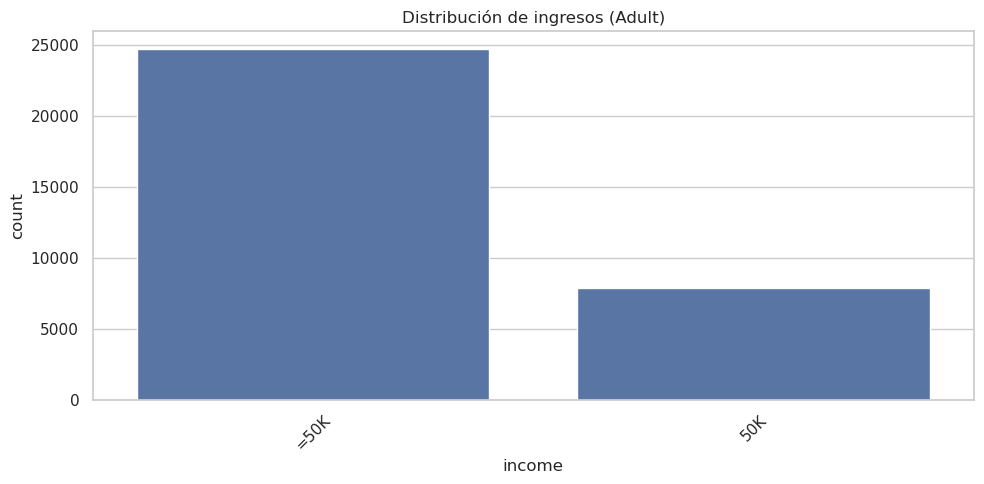

In [6]:
# Distribución de clase
sns.countplot(data=adult_df, x='income')
plt.title("Distribución de ingresos (Adult)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Distribución de la variable objetivo `income` (Adult Dataset)

Se observa una distribución binaria en la variable `income`, correspondiente a las clases "`<=50K`" y "`>50K`". La clase "`<=50K`" presenta una frecuencia marcadamente superior, confirmando la presencia de un desbalance de clases. Esta información tiene implicaciones directas en la etapa de modelado supervisado, ya que podría inducir sesgos hacia la clase mayoritaria en algoritmos no balanceados. La verificación de esta condición es clave para tomar decisiones sobre el uso de métricas apropiadas (como F1-score o balanced accuracy) y la eventual aplicación de estrategias de reponderación o ajuste de clases.

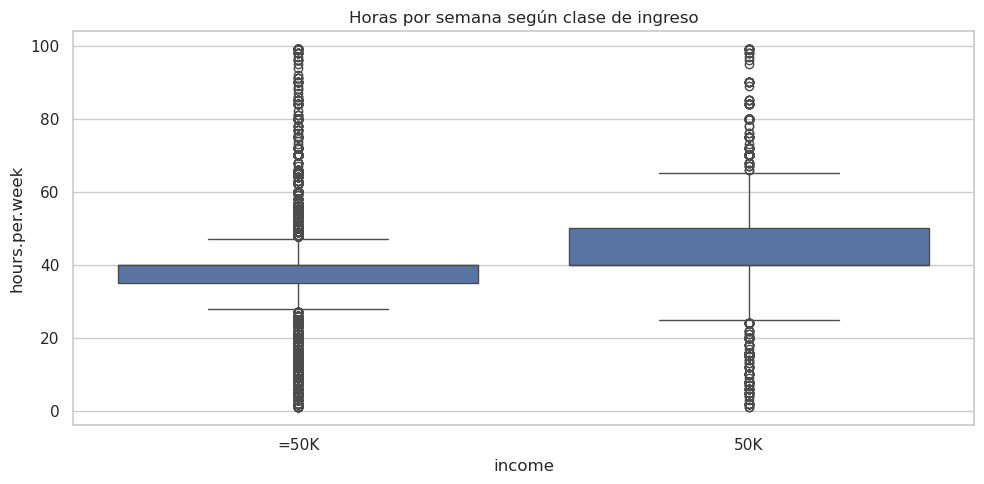

In [7]:
# Boxplot por horas trabajadas por semana
sns.boxplot(data=adult_df, x='income', y='hours.per.week')
plt.title("Horas por semana según clase de ingreso")
plt.tight_layout()
plt.show()

#### Comparación de `hours.per.week` según clase de ingreso (Adult Dataset)

Se observa la distribución de la variable `hours.per.week` diferenciada por clase de ingreso. Ambas categorías muestran medianas cercanas a las 40 horas, sin una separación marcada, aunque se aprecia una ligera tendencia a mayores horas trabajadas en la clase `>50K`. No obstante, en ambas clases se detecta una gran cantidad de outliers por fuera de los bigotes, lo cual indica una alta dispersión y posibles valores extremos de carga laboral. Esta información es relevante para el preprocesamiento, ya que puede requerir transformación, normalización o revisión contextual. Además, la superposición intercuartílica sugiere que `hours.per.week` tiene capacidad discriminativa limitada si se utiliza como predictor aislado.


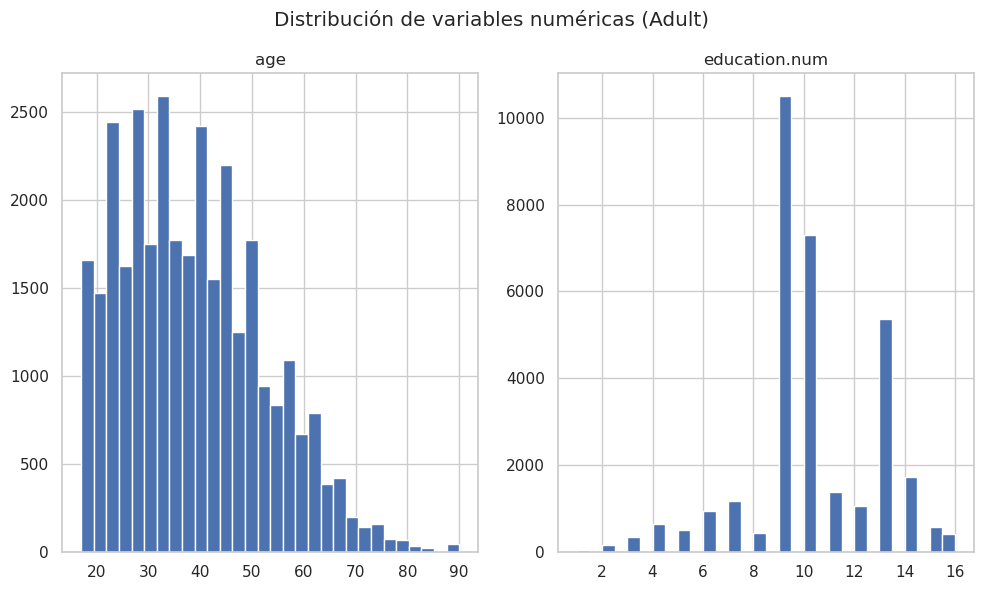

In [8]:
# Histogramas de variables numéricas principales
adult_df[['age', 'education.num']].hist(bins=30, figsize=(10, 6))
plt.suptitle("Distribución de variables numéricas (Adult)")
plt.tight_layout()
plt.show()

#### Distribución de la variable `age` (Adult Dataset)

La variable `age` presenta una distribución continua, con mayor concentración de observaciones entre los 25 y los 50 años. Se observa una caída progresiva en la frecuencia a partir de los 60, lo que es consistente con patrones laborales típicos. La forma general de la distribución es asimétrica hacia la derecha, con presencia de valores altos pero escasamente representados. Esta información sugiere que `age` es un predictor relevante, con comportamiento numérico válido, y podría ser considerado para discretización en tramos si se detectan umbrales diferenciadores en análisis posteriores.


#### Distribución de la variable `education.num` (Adult Dataset)

La variable `education.num`, de naturaleza ordinal, muestra una distribución discreta con picos de frecuencia en niveles intermedios, especialmente en valores correspondientes a secundaria y educación media superior. Los valores se extienden en el rango esperado (de 1 a 16) y presentan saltos regulares, lo que indica una codificación estructurada sin errores. Esta distribución valida su uso como predictor numérico en modelos supervisados y sugiere que representa de forma adecuada el nivel educativo de los individuos. Su comportamiento discreto permite su uso directo o como criterio para agrupación por niveles educativos.


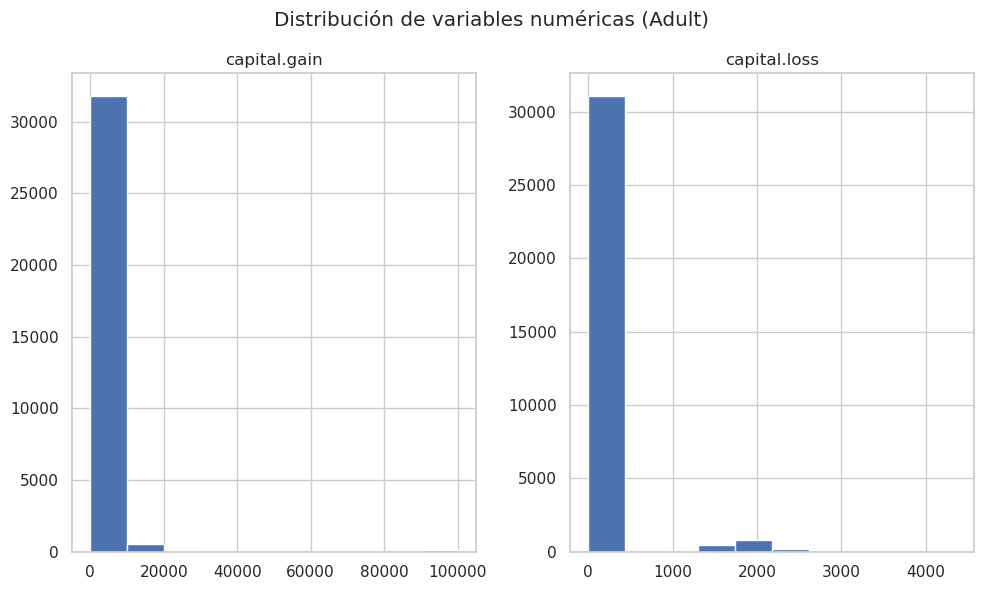

In [9]:
# Histogramas de variables numéricas principales
adult_df[['capital.gain', 'capital.loss']].hist(bins=10, figsize=(10, 6))
plt.suptitle("Distribución de variables numéricas (Adult)")
plt.tight_layout()
plt.show()

#### Distribución de la variable `capital.gain` (Adult Dataset)

La variable `capital.gain` muestra una distribución fuertemente asimétrica, con una alta concentración de observaciones en el valor cero y pocos valores extremos con magnitudes considerablemente mayores. Se identifican picos puntuales, como 99999, lo cual indica codificación concentrada en valores específicos. Esta estructura sugiere un comportamiento esporádico de la ganancia de capital en la población analizada. La variable puede inducir problemas en algoritmos sensibles a la escala o dispersión, por lo que podría ser transformada, discretizada, o reinterpretada como variable binaria para representar la presencia o ausencia de ganancia.

#### Distribución de la variable `capital.loss` (Adult Dataset)

La variable `capital.loss` presenta un comportamiento similar a `capital.gain`, con gran concentración en el valor cero y escasa presencia de valores positivos. La distribución es altamente dispersa y no continua, con valores que aparecen en frecuencias aisladas. Esta forma sugiere que las pérdidas de capital no son comunes en el conjunto de datos y que su variabilidad puede afectar negativamente a modelos sensibles a escalas o valores extremos. Se considera adecuado explorar alternativas como la recodificación binaria o transformaciones logarítmicas, dependiendo del impacto observado en etapas posteriores de modelado.


In [10]:
# HAR Dataset
print("\n=== HAR Dataset ===")


=== HAR Dataset ===


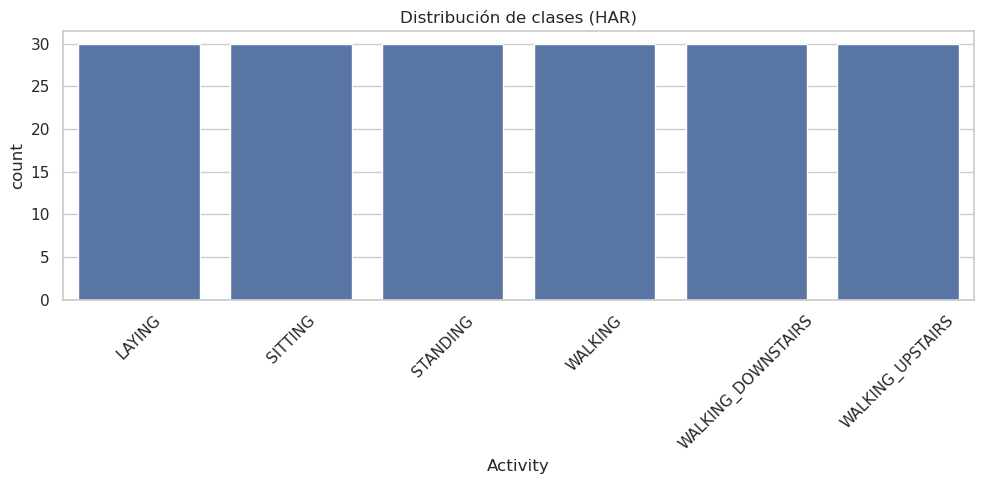

In [11]:
# Conteo por clase (Activity)
sns.countplot(data=har_df, x='Activity')
plt.title("Distribución de clases (HAR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Distribución de la variable objetivo `Activity` (HAR Dataset)

La variable `Activity` presenta una distribución perfectamente balanceada entre sus seis clases: `WALKING`, `WALKING_UPSTAIRS`, `WALKING_DOWNSTAIRS`, `SITTING`, `STANDING`, y `LAYING`, con 30 observaciones cada una. Esta distribución controlada asegura condiciones ideales para la comparación entre clases en tareas de clasificación supervisada. No se requiere corrección por desbalance, y se garantiza una representación equitativa durante la partición de datos. La codificación categórica también se muestra correcta y completa, sin valores anómalos ni clases residuales.


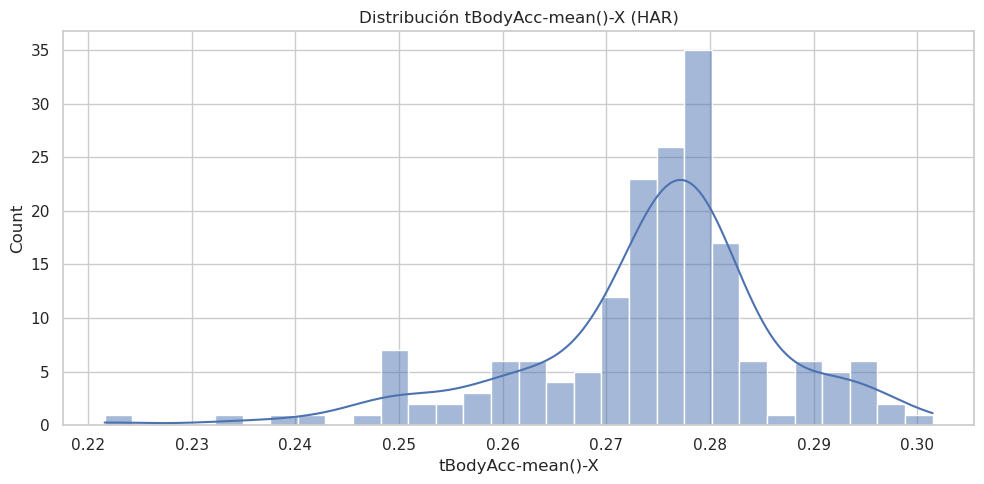

In [12]:
# Histograma de una variable significativa
sns.histplot(har_df['tBodyAcc-mean()-X'], bins=30, kde=True)
plt.title("Distribución tBodyAcc-mean()-X (HAR)")
plt.tight_layout()
plt.show()

#### Distribución de la variable `tBodyAcc-mean()-X` (HAR Dataset)

La variable `tBodyAcc-mean()-X` muestra una distribución aproximadamente simétrica y centrada alrededor de cero, sin presencia de colas largas ni valores extremos. Este comportamiento es consistente con una señal física estabilizada durante la recolección de datos de acelerometría en el eje X. La forma unimodal indica que la aceleración promedio presenta variabilidad controlada entre las observaciones, lo que favorece su uso directo como predictor sin necesidad de transformación adicional. Esta variable es representativa del comportamiento lineal del cuerpo durante las distintas actividades físicas.


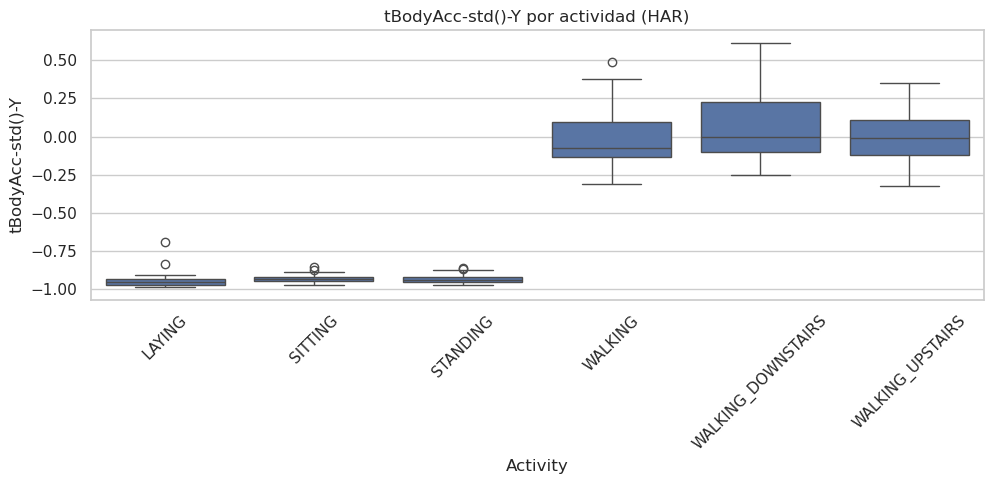

In [13]:
# Boxplot por actividad para una variable
sns.boxplot(data=har_df, x='Activity', y='tBodyAcc-std()-Y')
plt.title("tBodyAcc-std()-Y por actividad (HAR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Dispersión de `tBodyAcc-std()-Y` por actividad (HAR Dataset)

El gráfico muestra diferencias claras en la dispersión de `tBodyAcc-std()-Y` entre las distintas clases de actividad. Las actividades dinámicas (`WALKING`, `WALKING_UPSTAIRS`, `WALKING_DOWNSTAIRS`) presentan mayores valores de desviación estándar, mientras que las actividades estáticas (`SITTING`, `STANDING`, `LAYING`) exhiben valores considerablemente más bajos y concentrados. Este comportamiento indica que la aceleración vertical del cuerpo varía de manera significativa según el tipo de actividad física, lo cual posiciona a esta variable como un predictor discriminativo útil en tareas de clasificación.


In [14]:
# Gas Sensor Dataset
print("\n=== Gas Sensor Dataset ===")


=== Gas Sensor Dataset ===


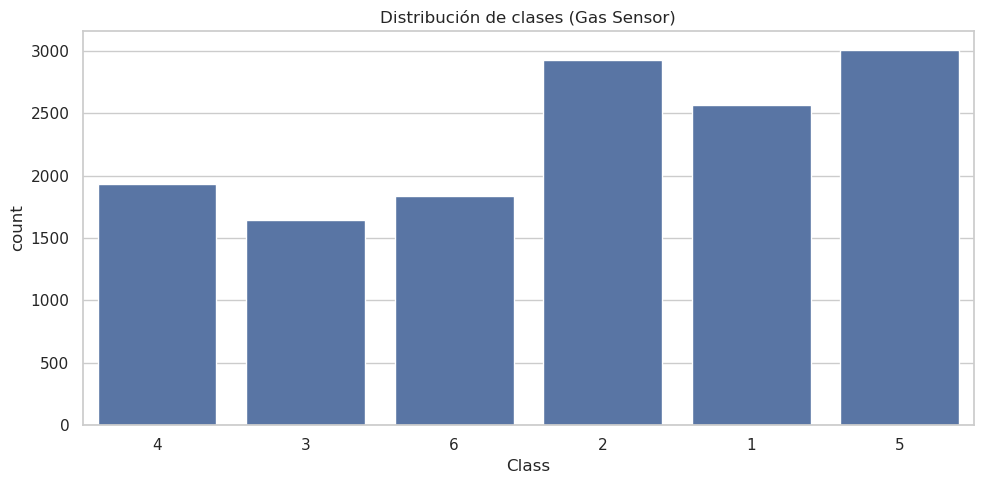

In [15]:
# Conteo de clases
sns.countplot(data=gas_df, x='Class')
plt.title("Distribución de clases (Gas Sensor)")
plt.tight_layout()
plt.show()

#### Distribución de clases de gas (`Class`) (Gas Sensor Dataset)

La variable `Class` representa la clase de gas detectado, codificada en seis niveles correspondientes a diferentes sustancias químicas puras. El gráfico revela una distribución desbalanceada, con clases significativamente más representadas que otras. Este patrón refleja la organización experimental del dataset por lotes, donde ciertos gases fueron muestreados con mayor frecuencia. La presencia completa de las seis clases está confirmada, aunque se identifican diferencias notables en volumen. Esta estructura implica que los modelos de clasificación multiclase deberán incorporar estrategias de corrección por desbalance, como ponderación de clases o evaluación mediante métricas sensibles a la distribución.


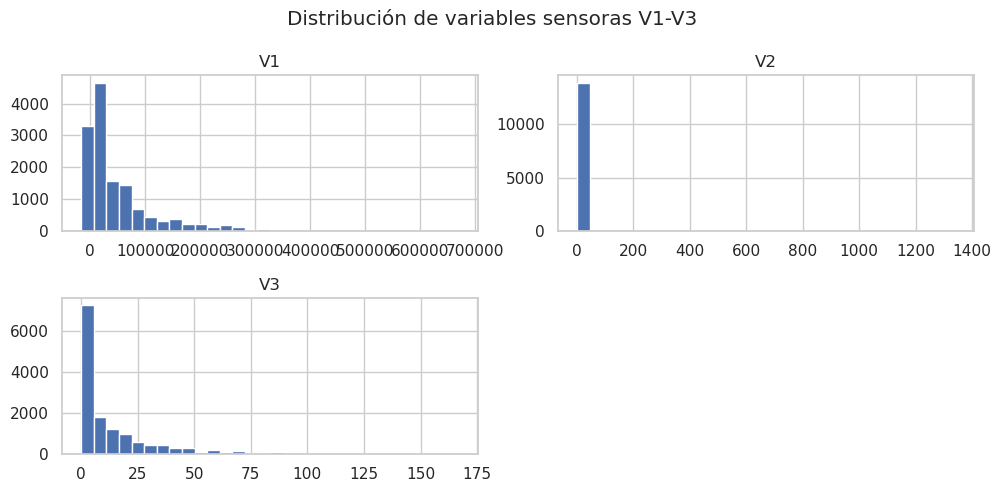

In [16]:
# Histograma de algunas variables sensoras representativas
gas_df[['V1', 'V2', 'V3']].hist(bins=30, figsize=(10, 5))
plt.suptitle("Distribución de variables sensoras V1-V3")
plt.tight_layout()
plt.show()

#### Distribución de la variable `V1` (Gas Sensor Dataset)

La variable `V1`, correspondiente a una característica extraída del primer sensor, presenta una distribución continua, con valores centrados en torno a un punto de concentración pero con colas asimétricas. El rango es amplio y la forma no se ajusta a una distribución normal, lo que es consistente con datos derivados de transformaciones sobre señales sensoriales. Este comportamiento sugiere que `V1` puede ser útil como predictor, aunque podría requerir normalización o escalado para integrarse adecuadamente en modelos multivariantes. No se observan discretizaciones artificiales ni anomalías estructurales.


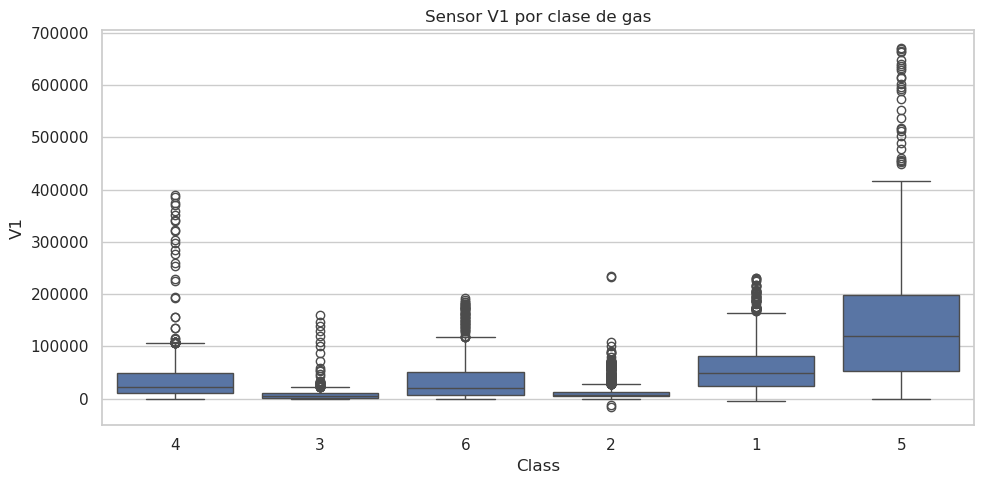

In [17]:
# Boxplot de variable sensora por clase
sns.boxplot(data=gas_df, x='Class', y='V1')
plt.title("Sensor V1 por clase de gas")
plt.tight_layout()
plt.show()

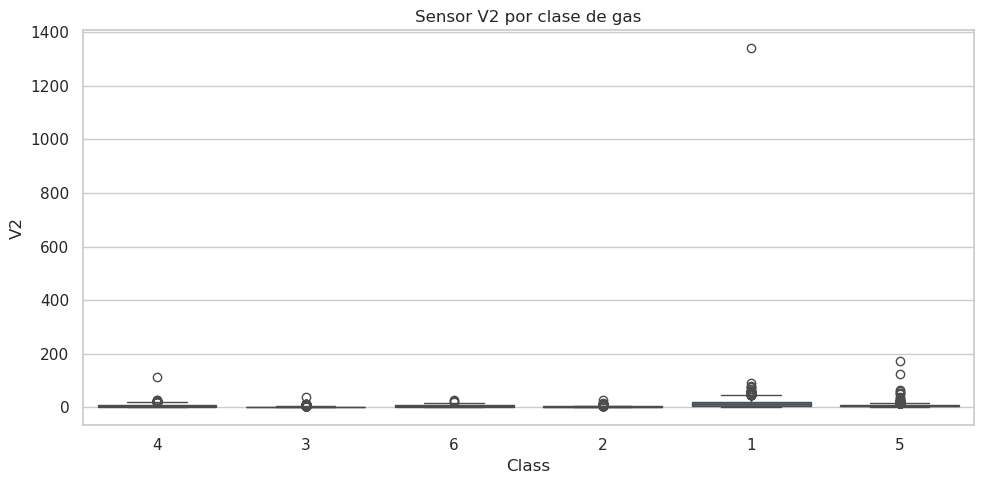

In [18]:
# Boxplot de variable sensora por clase
sns.boxplot(data=gas_df, x='Class', y='V2')
plt.title("Sensor V2 por clase de gas")
plt.tight_layout()
plt.show()

#### Distribución y dispersión de la variable `V2` (Gas Sensor Dataset)

La variable `V2`, correspondiente a una característica sensorial derivada del segundo sensor, presenta una distribución continua con rango amplio y comportamiento irregular. El histograma revela una forma no gaussiana, con valores extendidos hacia rangos positivos. La boxplot por clase (`Class`) muestra presencia clara de valores extremos en todas las categorías, particularmente en la clase 1, donde se identifica un valor atípico superior a 1300, considerablemente separado del resto de los datos. Estas observaciones indican que `V2` está expuesta a alta dispersión y valores influyentes, lo que sugiere la necesidad de aplicar transformaciones (e.g. logarítmica) o técnicas de manejo robusto de outliers para evitar distorsión en el modelado. A pesar de estos efectos, la variable conserva estructura informativa útil para discriminación multiclase.



## Documentación de conclusiones del análisis exploratorio (EDA)

Este documento resume los hallazgos obtenidos durante el la fase de análisis exploratorio de datos. Se describen los comportamientos observados en cada conjunto de datos, se identifican problemas estructurales, se evalúa la relevancia de las variables y se plantean las implicaciones directas para el preprocesamiento y modelado posterior. El objetivo es establecer un diagnóstico claro que fundamente las decisiones técnicas de las siguientes fases del proyecto.

---

### Dataset: Adult

**Distribución y estructura**

- La variable objetivo `income` presenta una distribución binaria claramente desbalanceada, con una mayoría significativa de observaciones en la clase "`<=50K`".
- Las variables `age` y `education.num` muestran una distribución esperada y sin valores anómalos, lo que permite su uso como predictores directos.
- Las variables `capital.gain` y `capital.loss` presentan una estructura altamente sesgada, con acumulación en el valor cero y valores atípicos de gran magnitud en ambos casos.
- La variable `hours.per.week` muestra outliers en ambas clases de ingreso, aunque la mediana se mantiene en torno a las 40 horas semanales.

**Calidad de los datos**

- Se identificaron valores nulos reales (`NaN`) en las columnas `workclass`, `occupation` y `native.country`, lo que requerirá estrategias específicas de imputación o descarte.
- No se detectaron errores de codificación ni clases mal definidas.

**Implicaciones para el preprocesamiento**

- Será necesario definir un tratamiento para los valores faltantes antes de proceder al modelado.
- Las variables de capital deben ser transformadas, recodificadas o tratadas como binarias debido a su distribución.
- El desbalance de clases implica la necesidad de utilizar métricas robustas (como F1-score, recall ponderado) y, posiblemente, técnicas de reponderación o muestreo estratificado.

---

### Dataset: HAR

**Distribución y estructura**

- La variable `Activity` presenta una distribución perfectamente balanceada, con 30 observaciones por clase, lo que favorece un análisis multiclase sin necesidad de corrección.
- Las variables `tBodyAcc-mean()-X` y `tBodyAcc-std()-Y` presentan una distribución controlada y coherente, con comportamientos diferenciables entre actividades.
- Se observan diferencias claras entre actividades dinámicas (`WALKING`, `WALKING_UPSTAIRS`, `WALKING_DOWNSTAIRS`) y actividades estáticas (`SITTING`, `STANDING`, `LAYING`), especialmente en los valores de desviación estándar.

**Calidad de los datos**

- No se detectaron valores nulos, codificaciones incorrectas ni clases residuales.

**Implicaciones para el preprocesamiento**

- El conjunto está en condiciones adecuadas para ser utilizado directamente en tareas de clasificación supervisada multiclase.
- Las variables de aceleración pueden utilizarse sin necesidad de codificación adicional, aunque podrían beneficiarse de escalado estándar.
- La representación balanceada de clases permite utilizar validación cruzada estratificada y métricas convencionales sin sesgo.

---

### Dataset: Gas Sensor

**Distribución y estructura**

- La variable `Class` presenta las seis clases esperadas, correspondientes a gases puros distintos, pero con una distribución visiblemente desbalanceada, como resultado del diseño experimental del conjunto.
- Las variables sensoriales (como `V1` y `V2`) presentan alta variabilidad, rangos amplios, y valores extremos importantes, especialmente en ciertas clases.
- El sensor `V2` muestra valores atípicos superiores a 1300 en algunos casos, lo que evidencia la presencia de valores influyentes.

**Calidad de los datos**

- No se detectaron valores nulos, aunque se evidenció alta dispersión en la mayoría de las variables numéricas.
- No hay errores de codificación en la variable objetivo.

**Implicaciones para el preprocesamiento**

- El dataset requerirá transformaciones como normalización o estandarización para mitigar el efecto de escalas heterogéneas.
- Los valores extremos deberán ser tratados mediante técnicas robustas (winsorización, transformación logarítmica o exclusión controlada).
- El desbalance multiclase deberá abordarse con técnicas de reponderación o mediante el uso de métricas que no asuman uniformidad de clases, como macro F1-score o recall ponderado.

---

### Conclusión general

El análisis exploratorio de los tres conjuntos de datos revela que todos presentan estructura utilizable para tareas de modelado supervisado o no supervisado, aunque con distintas necesidades de preprocesamiento. Se identificaron problemas de desbalance, nulos y valores extremos, que deben ser tratados en la siguiente fase del proyecto.
